# Intro

This notebook gonna do a cluster Analysis for Facebook Ads Data from kaggle.

## Data

The data used in this project is from an anonymous organisation’s social media ad campaign. The data file can be downloaded from here. The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables.

1.) ad_id: an unique ID for each ad.

2.) xyz_campaign_id: an ID associated with each ad campaign of XYZ company.

3.) fb_campaign_id: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

## Loading Data

In [2]:
raw_data=pd.read_csv('KAG_conversion_data.csv')

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
ad_id                  1143 non-null int64
xyz_campaign_id        1143 non-null int64
fb_campaign_id         1143 non-null int64
age                    1143 non-null object
gender                 1143 non-null object
interest               1143 non-null int64
Impressions            1143 non-null int64
Clicks                 1143 non-null int64
Spent                  1143 non-null float64
Total_Conversion       1143 non-null int64
Approved_Conversion    1143 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 98.3+ KB


In [4]:
raw_data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
raw_data.age.value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

# Adding KPI

1. Click-through-rate (CTR). This is the percentage of how many of our impressions became clicks. A high CTR is often seen as a sign of good creative being presented to a relevant audience. A low click through rate is suggestive of less-than-engaging adverts (design and / or messaging) and / or presentation of adverts to an inappropriate audience. What is seen as a good CTR will depend on the type of advert (website banner, Google Shopping ad, search network test ad etc.) and can vary across sectors, but 2% would be a reasonable benchmark.
2. Conversion Rate (CR). This is the percentage of clicks that result in a 'conversion'. What a conversion is will be determined by the objectives of the campaign. It could be a sale, someone completing a contact form on a landing page, downloading an e-book, watching a video, or simply spending more than a particular amount of time or viewing over a target number of pages on a website.
3. Cost Per Click (CPC). Self-explanatory this one: how much (on average) did each click cost. While it can often be seen as desirable to reduce the cost per click, the CPC needs to be considered along with other variables. For example, a campaign with an average CPC of £0.5 and a CR of 5% is likely achieving more with its budget than one with a CPC of £0.2 and a CR of 1% (assuming the conversion value is the same.
4. Cost Per Conversion. Another simple metric, this figure is often more relevant than the CPC, as it combines the CPC and CR metrics, giving us an easy way to quickly get a feel for campaign effectiveness.

## Adding CPC and CTR

In [6]:
data=raw_data.copy()

In [7]:
data=raw_data
data['CTR']=round(raw_data.Clicks/raw_data.Impressions,2)
data['CPC']=round(raw_data.Spent/raw_data.Clicks,2).fillna(0)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
ad_id                  1143 non-null int64
xyz_campaign_id        1143 non-null int64
fb_campaign_id         1143 non-null int64
age                    1143 non-null object
gender                 1143 non-null object
interest               1143 non-null int64
Impressions            1143 non-null int64
Clicks                 1143 non-null int64
Spent                  1143 non-null float64
Total_Conversion       1143 non-null int64
Approved_Conversion    1143 non-null int64
CTR                    1143 non-null float64
CPC                    1143 non-null float64
dtypes: float64(3), int64(8), object(2)
memory usage: 116.2+ KB


Let's trim out the campaign and demographic variables and look for some correlations.

In [9]:
names=['CTR','CPC','Approved_Conversion','Total_Conversion','Impressions','Spent','Clicks']
camp_demog=data[names]
camp_demog.head()

,CTR,CPC,Approved_Conversion,Total_Conversion,Impressions,Spent,Clicks
0,0.0,1.43,1,2,7350,1.43,1
1,0.0,0.91,0,2,17861,1.82,2
2,0.0,0.00,0,1,693,0.00,0
3,0.0,1.25,0,1,4259,1.25,1
4,0.0,1.29,1,1,4133,1.29,1


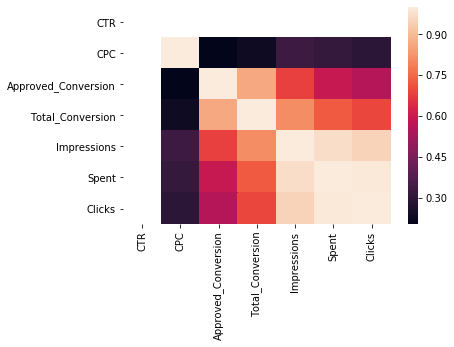

In [10]:
scalr_fit=preprocessing.StandardScaler().fit_transform(camp_demog)
sns.heatmap((pd.DataFrame(scalr_fit,columns=names)).corr())

From the plot, we can see there have some very strong correlation between the variables such as impression with clicks, spents. 
With less strong correlation such as impression with total_conversion, total_conversion with approved_conversion.

Let's dive into a specific campagin and get a bit more granular.

From the correlation, we can see more spent that leads to more clicks and more conversion.

1178         AxesSubplot(0.1,0.559091;0.363636x0.340909)
916     AxesSubplot(0.536364,0.559091;0.363636x0.340909)
936              AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

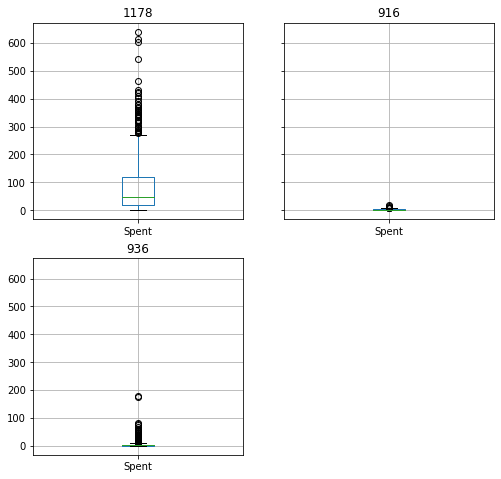

In [11]:
data['xyz_campaign_id']=data.xyz_campaign_id.astype('str')
data[['xyz_campaign_id','Spent']].groupby('xyz_campaign_id').boxplot(figsize=(8,8))

From above boxplot, we can say that '1178' is the one to go for, so we will create a new dataframe that just includes the 1178.

In [12]:
data_1178=data.loc[data.xyz_campaign_id=='1178',:]
data_1178.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 518 to 1142
Data columns (total 13 columns):
ad_id                  625 non-null int64
xyz_campaign_id        625 non-null object
fb_campaign_id         625 non-null int64
age                    625 non-null object
gender                 625 non-null object
interest               625 non-null int64
Impressions            625 non-null int64
Clicks                 625 non-null int64
Spent                  625 non-null float64
Total_Conversion       625 non-null int64
Approved_Conversion    625 non-null int64
CTR                    625 non-null float64
CPC                    625 non-null float64
dtypes: float64(3), int64(7), object(3)
memory usage: 68.4+ KB


There's no missing data, therefore let's see some distribution of our data.

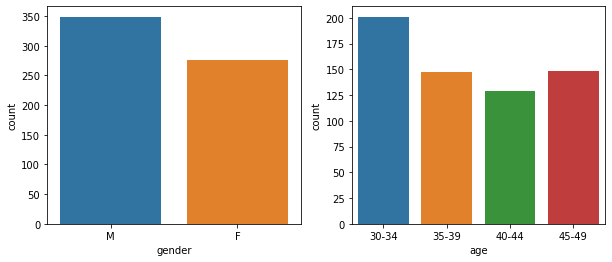

In [13]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
sns.countplot(data_1178.gender,ax=ax1)
sns.countplot(data_1178.age,ax=ax2)

Text(0.5, 1.0, 'Approved Conversion')

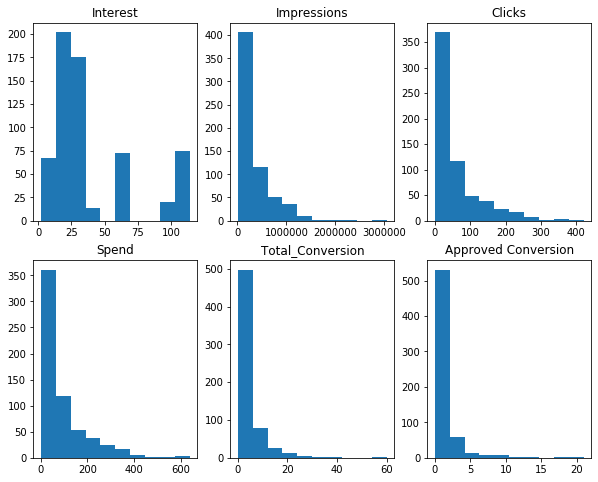

<Figure size 432x288 with 0 Axes>

In [14]:
f,ax=plt.subplots(ncols=3,nrows=2,figsize=(10,8))
plt.figure()
ax[0,0].hist(data_1178.interest)
ax[0,0].set_title('Interest')
ax[0,1].hist(data_1178.Impressions)
ax[0,1].set_title('Impressions')
ax[0,2].hist(data_1178.Clicks)
ax[0,2].set_title('Clicks')
ax[1,0].hist(data_1178.Spent)
ax[1,0].set_title('Spend')
ax[1,1].hist(data_1178.Total_Conversion)
ax[1,1].set_title('Total_Conversion')
ax[1,2].hist(data_1178.Approved_Conversion)
ax[1,2].set_title('Approved Conversion')

We can see there is no obvious un-blanced categorical variables, but most of numerical variables have right tail skewness.

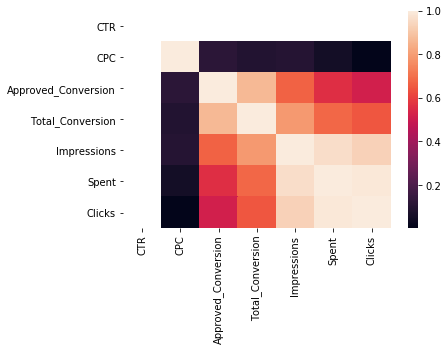

In [15]:
scaler_fit=preprocessing.StandardScaler().fit_transform(data_1178[names])
sns.heatmap(pd.DataFrame(scaler_fit,columns=names).corr())

The correlation almost stay the same, therefore, therefore, the high correlation variables we still wants to have more details.

## More Feature Engineering

In [20]:
data_1178['Spent']=data_1178.Spent.replace(0,0.1)
data_1178['total_Conv']=data_1178.Total_Conversion+data_1178.Approved_Conversion
data_1178['conVal']=data_1178.Total_Conversion*10
data_1178['appConval']=data_1178.Approved_Conversion*100
data_1178['TotalConvalue']=data_1178.conVal+data_1178.appConval
data_1178['costpercon']=round(data_1178.Spent/data_1178.total_Conv,2)
data_1178['ROAS']=round(data_1178.total_Conv/data_1178.Spent,2)

C:\Users\93444\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\93444\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\93444\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

# Relationship with Gender and ROAS

Firstly, I want to see is there have any different between male and female in ROAS.

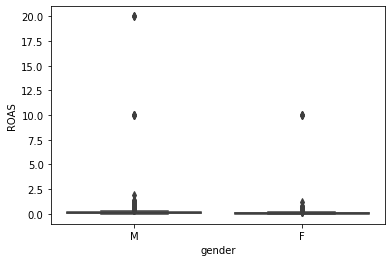

In [21]:
sns.boxplot(x=data_1178.gender,y=data_1178.ROAS)

In [22]:
data_1178.groupby('gender').ROAS.mean()

gender
F    0.236775
M    0.469255
Name: ROAS, dtype: float64

WE can see the Female have almost double ROAS compare with Male.

In [23]:
grouped_interest = data_1178.groupby('interest').agg({'ROAS':['median','mean'],'Clicks':'sum'}) 
grouped_interest.columns = ['_'.join(x) for x in grouped_interest.columns.ravel()]
grouped_interest = grouped_interest.sort_values(by='ROAS_mean', ascending=0)
grouped_interest.head(10)

,ROAS_median,ROAS_mean,Clicks_sum
interest,,,
2,0.090,1.805556,306
63,0.055,1.259231,1615
66,0.120,1.066364,138
31,0.100,0.888667,189
23,0.060,0.686471,372
26,0.045,0.663333,957
21,0.140,0.650909,493
10,0.050,0.642000,3077
32,0.060,0.595238,1129
